In [10]:
from matplotlib import rc
from lmfit import Model
rc('text', usetex=False)
rc("font", family="serif")
import numpy as np #notwendige Pakete laden
import matplotlib.pyplot as plt
import matplotlib
import math
import matplotlib.ticker as ticker
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator, NullLocator, IndexLocator, FixedLocator, NullFormatter)
import pandas as pd
from PIL import Image


In [11]:
matplotlib.use("pgf")
plt.rcParams.update({
    "font.family": "serif",
    "text.usetex": True,
    "pgf.rcfonts": False,
    "figure.figsize": (6.48, 2.75),
    "pgf.texsystem": "pdflatex",
    "font.size": 13,
    "text.latex.preamble" :  r"\usepackage{amsmath} \usepackage[utf8]{inputenc} \usepackage[T1]{fontenc} \usepackage[output-decimal-marker={,},print-unity-mantissa=false]{siunitx} \sisetup{per-mode=fraction, separate-uncertainty = true, locale = DE} \usepackage[acronym, toc, section=section, nonumberlist, nopostdot]{glossaries-extra}",
    "pgf.preamble": r"\usepackage{amsmath} \usepackage[utf8]{inputenc} \usepackage[T1]{fontenc} \usepackage[output-decimal-marker={,},print-unity-mantissa=false]{siunitx} \sisetup{per-mode=fraction, separate-uncertainty = true, locale = DE} \usepackage[acronym, toc, section=section, nonumberlist, nopostdot]{glossaries-extra}",
    #r"\usepackage[acronym, toc, section=section, nonumberlist, nopostdot]{glossaries-extra}"])
})

In [12]:
import matplotlib.ticker

class OOMFormatter(matplotlib.ticker.ScalarFormatter):
    def __init__(self, order=0, fformat="%1.1f", offset=True, mathText=True):
        self.oom = order
        self.fformat = fformat
        matplotlib.ticker.ScalarFormatter.__init__(self,useOffset=offset,useMathText=mathText)
    def _set_order_of_magnitude(self):
        self.orderOfMagnitude = self.oom
    def _set_format(self):
        self.format = self.fformat
        if self._useMathText:
            self.format = ('\\num{%s}' % self.format)
    

In [13]:
import os
from matplotlib.patches import Ellipse
import skimage.transform

In [14]:
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator, NullLocator, LogLocator,FormatStrFormatter, FuncFormatter)

In [15]:
from skimage.io import imread

In [16]:
data_path = '220501_pictures/scattering/'
plots_output_path = 'plots_output/'

# Resonance

In [17]:
from mpl_toolkits.axes_grid1 import ImageGrid

In [18]:
lognorm = matplotlib.colors.LogNorm(1,250)

In [19]:
cmap = matplotlib.cm.get_cmap('plasma').copy()


In [20]:
prop = dict(arrowstyle="-|>,head_width=0.2,head_length=0.8",
            shrinkA=0,shrinkB=0, fc='green', ec='green', color='green')

## Show pedestals and raw pictures

Axes(0.125,0.125;0.775x0.755)



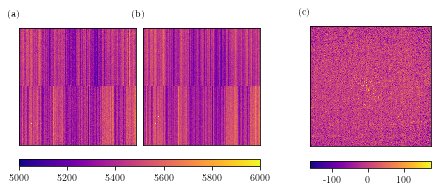

In [50]:
%matplotlib inline
#grob
fig = plt.figure(figsize=(6.48,5.5))
(subfig_l, subfig_r) = fig.subfigures(nrows=1, ncols=2, width_ratios=(2,1), wspace=0, hspace=0.2)
grid = ImageGrid(subfig_l, 111,          # as in plt.subplot(111)
                 nrows_ncols=(1,2),
                 axes_pad=0.1,
                 share_all=True,
                 cbar_location="bottom",
                 cbar_mode="single",
                 cbar_size=0.1,
                 #cbar_pad=0.15,
                 )
grid2 = ImageGrid(subfig_r, 111,          # as in plt.subplot(111)
                 nrows_ncols=(1,1),
                 axes_pad=(0.0,0.1),
                 share_all=True,
                 cbar_location="bottom",
                 cbar_mode="single",
                 cbar_size=0.1,
                 #cbar_pad=0.15,
                 )
print(grid[0])
imgs = []
lognorm_raw = matplotlib.colors.SymLogNorm(vmin=-250,vmax=250, linthresh=1.)
#lognorm_raw =  matplotlib.colors.Normalize(vmin=5e3,vmax=6e5)
norm = matplotlib.colors.Normalize(5e3, 6e3)
image = imread(data_path + 'capture_without_pedestal_substraction/image_sum_1.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'peds/ped_0.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'no_filter_resonance/070322_no_filter_sum_1.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
#graph[image == 0] = np.nan
imgs.append(graph)

letters = ['(a)', '(b)', '(c)']
ims = []
c = 0 
for axis, img, letter in zip(grid, imgs, letters):
    #axis.axis('off')
    axis.set_xticks([]) 
    axis.set_yticks([])
    axis.text(-0.1, 1.1, letter, transform=axis.transAxes,)
    im = axis.pcolormesh(img, cmap=cmap, norm=norm,rasterized=True)
    #fig.colorbar(ims[c], orientation='horizontal', ax=axis, fraction=0.043, pad=0.04,)
    axis.cax.colorbar(im,  format=FuncFormatter(lambda x, pos: r"%d" % x if x != 1 else "1"))

axis = grid2[0]
axis.set_xticks([]) 
axis.set_yticks([])
axis.text(-0.1, 1.1, letters[2], transform=axis.transAxes,)
im = axis.pcolormesh(imgs[2], cmap=cmap, norm=None,rasterized=True)
#fig.colorbar(ims[c], orientation='horizontal', ax=axis, fraction=0.043, pad=0.04,)
axis.cax.colorbar(im,  format=FuncFormatter(lambda x, pos: r"%d" % x if x != 1 else "1"))


#axis.annotate("center of transfomration", (30,99),(150, 10),arrowprops=prop)
print()
# for im in ims:
#     cb = axis.cax.colorbar(im,  format=FuncFormatter(lambda x, pos: r"%d" % x if x != 1 else "1"))
#     # cb = f.colorbar(im, orientation='vertical', ax=axs[2], fraction=0.043, pad=0.04,)
# ticklabs = cb.ax.get_yticklabels()
# for t in ticklabs:
#     t.set_verticalalignment('center')

#fig.tight_layout()


In [51]:
fig.savefig(plots_output_path + 'capture_ped_diff.pgf',bbox_inches='tight', pad_inches=0, dpi=500)

## Thresholding

C:\Users\lunin\AppData\Local\Temp/ipykernel_15992/1980255628.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


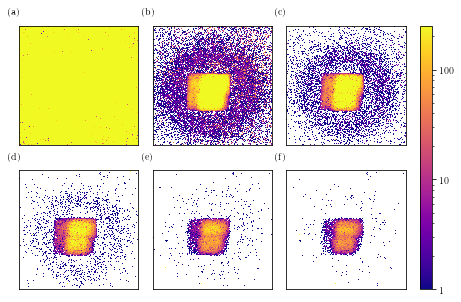

In [12]:
%matplotlib inline
#grob

fig = plt.figure(figsize=(6.48,7.5))
# fig.suptitle('Gd M5 scattering, no filter')
grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(2,3),
                 axes_pad=(0.2, 0.35),
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="5%",
                 #cbar_pad=0.15,
                 )
imgs = []
image = imread(data_path + 'th_0_resonance/single_count_mask_only_th_0_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_100_resonance/single_count_mask_only_th_100_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_125_resonance/single_count_mask_only_th_125_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_150_resonance/single_count_mask_only_th_150_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_170_resonance/single_count_mask_only_th_170_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_180_resonance/single_count_mask_only_th_180_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

letters = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']

for axis, img, letter in zip(grid, imgs, letters):
    #axis.axis('off')
    axis.set_xticks([]) 
    axis.set_yticks([])
    axis.text(-0.1, 1.1, letter, transform=axis.transAxes,)
    im = axis.pcolormesh(img, cmap=cmap, norm=lognorm,rasterized=True )

#axis.annotate("center of transfomration", (30,99),(150, 10),arrowprops=prop)
cb = axis.cax.colorbar(im,  format=FuncFormatter(lambda x, pos: r"%d" % x if x != 1 else "1"))
    # cb = f.colorbar(im, orientation='vertical', ax=axs[2], fraction=0.043, pad=0.04,)

fig.tight_layout()


In [13]:
fig.savefig(plots_output_path + 'th_0_100_125_150_170_180.pgf',bbox_inches='tight', pad_inches=0, dpi=500)

C:\Users\lunin\AppData\Local\Temp/ipykernel_21784/100662026.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


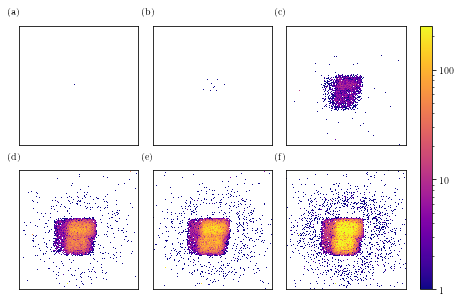

In [57]:
%matplotlib inline
#grob

fig = plt.figure(figsize=(6.48,7.5))
# fig.suptitle('Gd M5 scattering, no filter')
grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(2,3),
                 axes_pad=(0.2, 0.35),
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="5%",
                 #cbar_pad=0.15,
                 )
imgs = []
image = imread(data_path + 'th_150_resonance/single_count_mask_only_th_150_sum_1.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_150_resonance/single_count_mask_only_th_150_sum_5.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_150_resonance/single_count_mask_only_th_150_sum_1000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_150_resonance/single_count_mask_only_th_150_sum_10000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_150_resonance/single_count_mask_only_th_150_sum_20000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_150_resonance/single_count_mask_only_th_150_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

letters = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']

for axis, img, letter in zip(grid, imgs, letters):
    #axis.axis('off')
    axis.set_xticks([]) 
    axis.set_yticks([])
    axis.text(-0.1, 1.1, letter, transform=axis.transAxes,)
    im = axis.pcolormesh(img, cmap=cmap, norm=lognorm,rasterized=True )

#axis.annotate("center of transfomration", (30,99),(150, 10),arrowprops=prop)
cb = axis.cax.colorbar(im,  format=FuncFormatter(lambda x, pos: r"%d" % x if x != 1 else "1"))
    # cb = f.colorbar(im, orientation='vertical', ax=axs[2], fraction=0.043, pad=0.04,)

fig.tight_layout()


In [58]:
fig.savefig(plots_output_path + 'th_150_sums.pgf',bbox_inches='tight', pad_inches=0, dpi=500)

In [ ]:
%matplotlib inline
#grob

fig = plt.figure(figsize=(6.48,5.5))
# fig.suptitle('Gd M5 scattering, no filter')
grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(1,3),
                 axes_pad=(0.1, 0.25),
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 #cbar_pad=0.15,
                 )
imgs = []

image = imread(data_path + 'th_150_resonance/single_count_mask_only_th_150_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_170_resonance/single_count_mask_only_th_170_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_180_resonance/single_count_mask_only_th_180_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

letters = ['(a)', '(b)', '(c)']

for axis, img, letter in zip(grid, imgs, letters):
    #axis.axis('off')
    axis.set_xticks([]) 
    axis.set_yticks([])
    axis.text(0, 300, letter)
    im = axis.pcolormesh(img, cmap=cmap, norm=lognorm,rasterized=True )

#axis.annotate("center of transfomration", (30,99),(150, 10),arrowprops=prop)
cb = axis.cax.colorbar(im,  format=FuncFormatter(lambda x, pos: r"%d" % x if x != 1 else "1"))
    # cb = f.colorbar(im, orientation='vertical', ax=axs[2], fraction=0.043, pad=0.04,)
ticklabs = cb.ax.get_yticklabels()
for t in ticklabs:
    t.set_verticalalignment('center')

fig.tight_layout()
fig.savefig(plots_output_path + 'th_150_170_180.pgf',bbox_inches='tight', pad_inches=0, dpi=500)

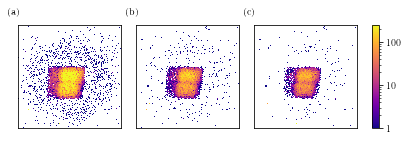

In [60]:
%matplotlib inline
#grob

fig = plt.figure(figsize=(6.48,5.5))
# fig.suptitle('Gd M5 scattering, no filter')
grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(1,3),
                 axes_pad=(0.2, 0.35),
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 #cbar_pad=0.15,
                 )
imgs = []

image = imread(data_path + 'th_150_resonance/single_count_mask_only_th_150_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_170_resonance/single_count_mask_only_th_170_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_180_resonance/single_count_mask_only_th_180_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

letters = ['(a)', '(b)', '(c)']

for axis, img, letter in zip(grid, imgs, letters):
    #axis.axis('off')
    axis.set_xticks([]) 
    axis.set_yticks([])
    axis.text(-0.1, 1.1, letter, transform=axis.transAxes,)
    im = axis.pcolormesh(img, cmap=cmap, norm=lognorm,rasterized=True )

#axis.annotate("center of transfomration", (30,99),(150, 10),arrowprops=prop)
cb = axis.cax.colorbar(im,  format=FuncFormatter(lambda x, pos: r"%d" % x if x != 1 else "1"))
    # cb = f.colorbar(im, orientation='vertical', ax=axs[2], fraction=0.043, pad=0.04,)

#fig.tight_layout()

In [61]:
fig.savefig(plots_output_path + 'th_150_170_180.pgf',bbox_inches='tight', pad_inches=0, dpi=500)

C:\Users\lunin\AppData\Local\Temp/ipykernel_15992/4232310560.py:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


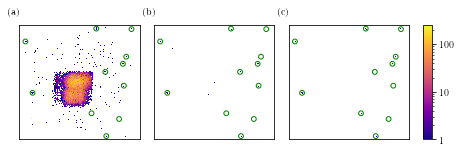

In [18]:
%matplotlib inline
#grob

fig = plt.figure(figsize=(6.48,5.5))
# fig.suptitle('Gd M5 scattering, no filter')
grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(1,3),
                 axes_pad=(0.2, 0.35),
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 #cbar_pad=0.15,
                 )
imgs = []

image = imread(data_path + 'th_180_resonance/single_count_mask_only_th_180_sum_50000.tiff')
image = image[80:320, 80:320]
image1 = image
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_other_resonance/single_count_mask_only_th_450_sum_50000.tiff')
image = image[80:320, 80:320]
image2 = image
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_other_resonance/single_count_mask_only_th_600_sum_50000.tiff')
image = image[80:320, 80:320]
image2 = image
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

letters = ['(a)', '(b)', '(c)']
spots = [(28,98), (162,233), (218,159), (183, 7), (181,142), (220,113), (210,43), (13,206),  (152,55), (236,232), (225,174)]

for axis, img, letter in zip(grid, imgs, letters):
    #axis.axis('off')
    axis.set_xticks([]) 
    axis.set_yticks([])
    axis.text(-0.1, 1.1, letter, transform=axis.transAxes,)
    im = axis.pcolormesh(img, cmap=cmap, norm=lognorm,rasterized=True )
    for spot in spots:
        circle = matplotlib.patches.Circle(spot, radius=5, fill=False, ec='green')
        axis.add_patch(circle)
cb = axis.cax.colorbar(im,  format=FuncFormatter(lambda x, pos: r"%d" % x if x != 1 else "1"))
    # cb = f.colorbar(im, orientation='vertical', ax=axs[2], fraction=0.043, pad=0.04,)

fig.tight_layout()

In [19]:
fig.savefig(plots_output_path + 'th_180_450_600.pgf',bbox_inches='tight', pad_inches=0, dpi=500)

In [44]:
def select_callback(eclick, erelease):
    """
    Callback for line selection.

    *eclick* and *erelease* are the press and release events.
    """
    x1, y1 = eclick.xdata, eclick.ydata
    x2, y2 = erelease.xdata, erelease.ydata
    print(f"({x1:3.2f}, {y1:3.2f}) --> ({x2:3.2f}, {y2:3.2f})")
    print(f"The buttons you used were: {eclick.button} {erelease.button}")


def toggle_selector(event):
    print('Key pressed.')
    if event.key == 't':
        for selector in selectors:
            name = type(selector).__name__
            if selector.active:
                print(f'{name} deactivated.')
                selector.set_active(False)
            else:
                print(f'{name} activated.')
                selector.set_active(True)
from matplotlib.widgets import EllipseSelector, RectangleSelector


### Polar transform

<IPython.core.display.Javascript object>


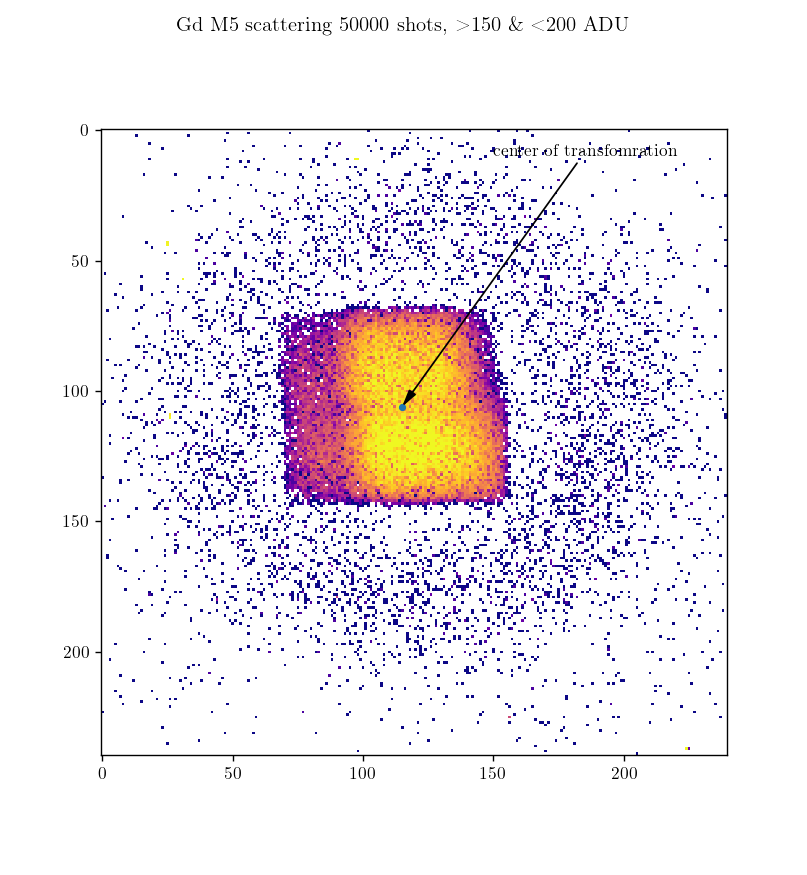

Text(150, 10, 'center of transfomration')

In [12]:
%matplotlib notebook
plt.rcParams["figure.figsize"] = (6.46,7)
plt.suptitle('Gd M5 scattering 50000 shots, >150 \& <200 ADU')
cmap = matplotlib.cm.get_cmap('plasma').copy()
image = imread('bachelorarbeit/220501_pictures/scattering/th_150_200_resonance/single_count_mask_only_th_150_200_sum_50000.tiff')
crop = image[80:320, 80:320]
plt.imshow(crop, norm=lognorm, cmap=cmap, interpolation='none', resample=False)
plt.scatter(115,106, s=10)
#plt.scatter(106, 115, s=10)
prop = dict(arrowstyle="-|>,head_width=0.2,head_length=0.8",
            shrinkA=0,shrinkB=0, fc='k', ec='k')

plt.annotate("center of transfomration", (115,106),(150, 10),arrowprops=prop)

(600, 600, 3)


Text(0, 0.5, 'phi')

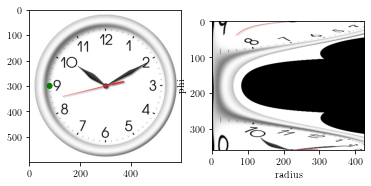

In [178]:
image = imread('C:/Users/lunin/Downloads/pl-245-01.jpg')
print(image.shape)
image_polar = skimage.transform.warp_polar(image, center=(300,80),  channel_axis=-1)
plt.subplot(121)
plt.imshow(image)
center = matplotlib.patches.Circle((80,300), ec='green', fc='green', radius=10)
plt.gca().add_patch(center)
plt.subplot(122)
plt.imshow(image_polar)
plt.xlabel('radius')
plt.ylabel('phi')

In [21]:
import matplotlib.patches as patches


(170, 360)


C:\Users\lunin\AppData\Local\Temp/ipykernel_17508/1308561786.py:69: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


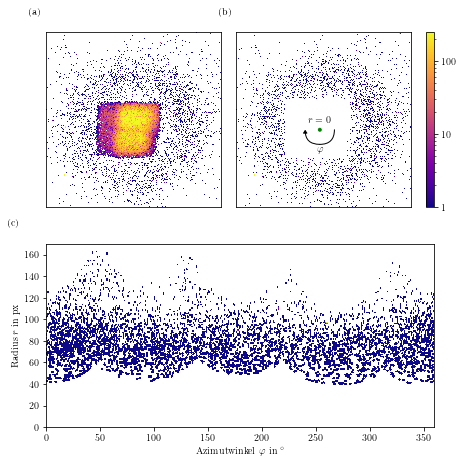

In [22]:
%matplotlib inline 
#grob
fig = plt.figure(figsize=(6.48,6.0))
(subfig_l, subfig_r) = fig.subfigures(nrows=2, ncols=1, height_ratios=(1,1), hspace=0.0)
grid = ImageGrid(subfig_l, 111,          # as in plt.subplot(111)
                 nrows_ncols=(1,2),
                 axes_pad=(0.2, 0.0),
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="5%",)
                 #cbar_pad=0.15,
imgs = []
                 
image = imread('220501_pictures/scattering/th_150_200_resonance/single_count_mask_only_th_150_200_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread('220501_pictures/scattering/th_150_200_resonance/single_count_mask_only_th_150_200_sum_50000.tiff')
image_masked = np.array(image)
image_masked = image_masked[80:320, 80:320]
image_masked[68:148,68:152] = 0
image_masked[91:152,150:156] = 0
imgs.append(image_masked)

image_polar = skimage.transform.warp_polar(image_masked,center=(106, 115))
letters = ['(a)', '(b)', '(c)']

axe = subfig_r.add_subplot(1,1,1)
#axe.set_title('polar')
axe.set_ylabel('Radius $r$ in px')
axe.set_xlabel('Azimutwinkel $\\varphi$ in \\si{\\degree}')
graph = image_polar.astype(np.float64)
graph[image_polar == 0] = np.nan
im = axe.pcolormesh(graph.T, cmap=cmap,rasterized=True,)
print(graph.T.shape)
axe.set_aspect('1')
axe.text(-0.1, 1.1, letters[2], transform=axe.transAxes,)

for axis, img, letter in zip(grid, imgs, letters):
    #axis.axis('off')
    axis.set_xticks([]) 
    axis.set_yticks([])
    axis.text(-0.1, 1.1, letter, transform=axis.transAxes,)
    im = axis.pcolormesh(img, cmap=cmap, norm=lognorm,rasterized=True)
    #fig.colorbar(ims[c], orientation='horizontal', ax=axis, fraction=0.043, pad=0.04,)
    axis.cax.colorbar(im,  format=FuncFormatter(lambda x, pos: r"%d" % x if x != 1 else "1"))

a3 = patches.FancyArrowPatch((115+20, 106), (115, 106-20), arrowstyle="-",
                             connectionstyle="angle3,angleA=90,angleB=0", shrinkA=0,shrinkB=0,  fc='k', ec='k')
a4 = patches.FancyArrowPatch((115, 106-20), (115-20, 106), arrowstyle="-|>,head_width=1.7,head_length=2.5",
                             connectionstyle="angle3,angleA=0,angleB=90", shrinkA=0,shrinkB=0,  fc='k', ec='k')
grid[1].add_patch(a3)
grid[1].add_patch(a4)

grid[1].text(115, 106-30, '$\\varphi$', ha='center')

center = matplotlib.patches.Circle((115,106), ec='green', fc='green', radius=2)

grid[1].add_patch(center)
#grid[0].add_patch(center)

grid[1].text(115, 106+10, '$r = 0$', ha='center')



fig.tight_layout()

In [166]:
fig.savefig(plots_output_path + 'th_150_200_masked_radial_transform.pgf',bbox_inches='tight', pad_inches=0, dpi=500)

<IPython.core.display.Javascript object>


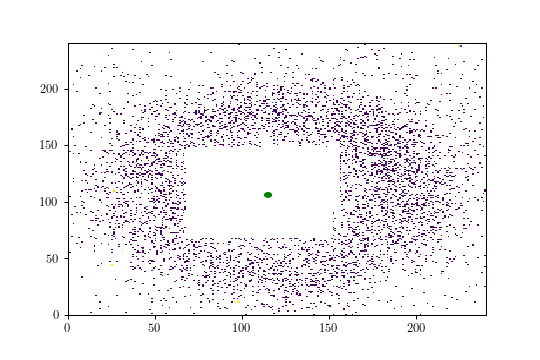

image masked sum: 12496 and polar sum: 0.00029989659329586764
(360, 170)


In [15]:
%matplotlib notebook
plt.pcolormesh(image_masked, norm=lognorm)
center = matplotlib.patches.Circle((115,106), ec='green', fc='green', radius=2)
plt.gca().add_patch(center)
image_polar = skimage.transform.warp_polar(image_masked,center=(115, 106))
print(f'image masked sum: {image_masked.sum(axis=(0,1))} and polar sum: {(image_polar.sum(axis=0)*np.arange(0,170)).sum()}')
print(image_polar.shape)

In [113]:
Ellipse?

In [185]:
image_polar[0].shape

(170,)

In [23]:
import lmfit
from lmfit.models import GaussianModel

In [24]:
def pxtomm(x):
    return x*10/400


def mmtopx(x):
    return x/10*400


[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 162
    # variables        = 3
    chi-square         = 1.0191e-15
    reduced chi-square = 6.4097e-18
    Akaike info crit   = -6410.40124
    Bayesian info crit = -6401.13845
[[Variables]]
    amplitude:  1.8168e-06 +/- 2.6164e-08 (1.44%) (init = 2.734402e-06)
    center:     73.9506425 +/- 0.29638580 (0.40%) (init = 72.52778)
    sigma:      17.7208401 +/- 0.29070508 (1.64%) (init = 20)
    fwhm:       41.7293886 +/- 0.68455814 (1.64%) == '2.3548200*sigma'
    height:     4.0901e-08 +/- 5.5778e-10 (1.36%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma)  =  0.615
    C(amplitude, center) =  0.122
17.72084008378656


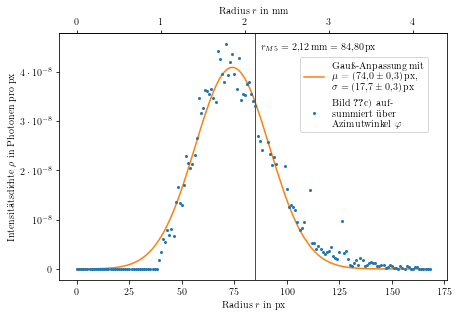

In [77]:
%matplotlib inline
mod = GaussianModel()
fig = plt.figure(figsize=(6.48,4.5))
axis = fig.gca()
azimutal_integrated = image_polar.sum(axis=0)
azimutal_integrated = azimutal_integrated[:169]
args = np.argwhere(azimutal_integrated < 4.729e-8)
radius = np.arange(0,169)
radius_fixed = radius[args][:,0]
azimutal_integrated_fixed= azimutal_integrated[args][:,0]
#plt.plot(radius, azimutal_integrated)
axis.errorbar(radius_fixed, azimutal_integrated_fixed, fmt='o', markersize=2, label='Bild \\ref{fig:th-150-200-maske-radial-transform}c) auf-\nsummiert über\nAzimutwinkel $\\varphi$')
params = mod.guess(x=radius_fixed, data=azimutal_integrated_fixed)
result = mod.fit(azimutal_integrated_fixed, params=params, x=radius_fixed)
print(result.fit_report())
axis.plot(radius_fixed, result.best_fit, label='Gauß-Anpassung mit\n $\\mu$ = \\SI{74.0(3)}{px},\n$\\sigma = \\SI{17.7(3)}{px}$')
axis.axvline(mmtopx(2.12), linestyle="-", color='red', linewidth=1, alpha=1)
axis.text(mmtopx(2.12)+3, 4.45e-8, '$r_{M5} = \\SI{2.12}{\\milli\\meter}= \\SI{%1.2f}{px}$' % mmtopx(2.12), ) 
#plt.axvline(84.24, color = 'green', label='expected $r_{M4} =$ \\SI{2.10}{\\milli\\meter} (84{,}8px) ring radius')
print(result.best_values['sigma'])
axis.set_xlabel('Radius $r$ in px')
axis.set_ylabel('Intensitätsdichte $\\rho$ in Photonen pro px')
axis.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: r"\num{%1.0e}" % x if x != 0 else "0"))

secax = axis.secondary_xaxis('top', functions=(pxtomm, mmtopx))
secax.set_xlabel('Radius $r$ in mm')


axis.legend(loc=(0.62, 0.6))
fig.tight_layout()

In [78]:
fig.savefig(plots_output_path + 'radius_fit.pgf',bbox_inches='tight', pad_inches=0, dpi=500)

## Clustering

# Off resonance

C:\Users\lunin\AppData\Local\Temp/ipykernel_15992/3876222032.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


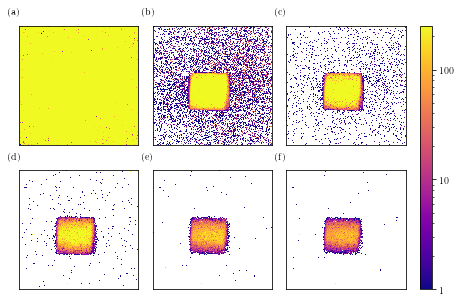

In [16]:
%matplotlib inline
#grob

fig = plt.figure(figsize=(6.48,7.5))
# fig.suptitle('Gd M5 scattering, no filter')
grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(2,3),
                 axes_pad=(0.2, 0.35),
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="5%",
                 #cbar_pad=0.15,
                 )
imgs = []
image = imread(data_path + 'th_0_off_resonance/single_count_mask_only_th_0_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_100_off_resonance/single_count_mask_only_th_100_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_125_off_resonance/single_count_mask_only_th_125_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_150_off_resonance/single_count_mask_only_th_150_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_170_off_resonance/single_count_mask_only_th_170_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

image = imread(data_path + 'th_180_off_resonance/single_count_mask_only_th_180_sum_50000.tiff')
image = image[80:320, 80:320]
graph = image.astype(np.float64)
graph[image == 0] = np.nan
imgs.append(graph)

letters = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']

for axis, img, letter in zip(grid, imgs, letters):
    #axis.axis('off')
    axis.set_xticks([]) 
    axis.set_yticks([])
    axis.text(-0.1, 1.1, letter, transform=axis.transAxes,)
    im = axis.pcolormesh(img, cmap=cmap, norm=lognorm,rasterized=True )

#axis.annotate("center of transfomration", (30,99),(150, 10),arrowprops=prop)
cb = axis.cax.colorbar(im,  format=FuncFormatter(lambda x, pos: r"%d" % x if x != 1 else "1"))
    # cb = f.colorbar(im, orientation='vertical', ax=axs[2], fraction=0.043, pad=0.04,)
fig.tight_layout()


In [17]:
fig.savefig(plots_output_path + 'th_0_100_125_150_170_180_off_resonance.pgf',bbox_inches='tight', pad_inches=0, dpi=500)

# dark images

<IPython.core.display.Javascript object>


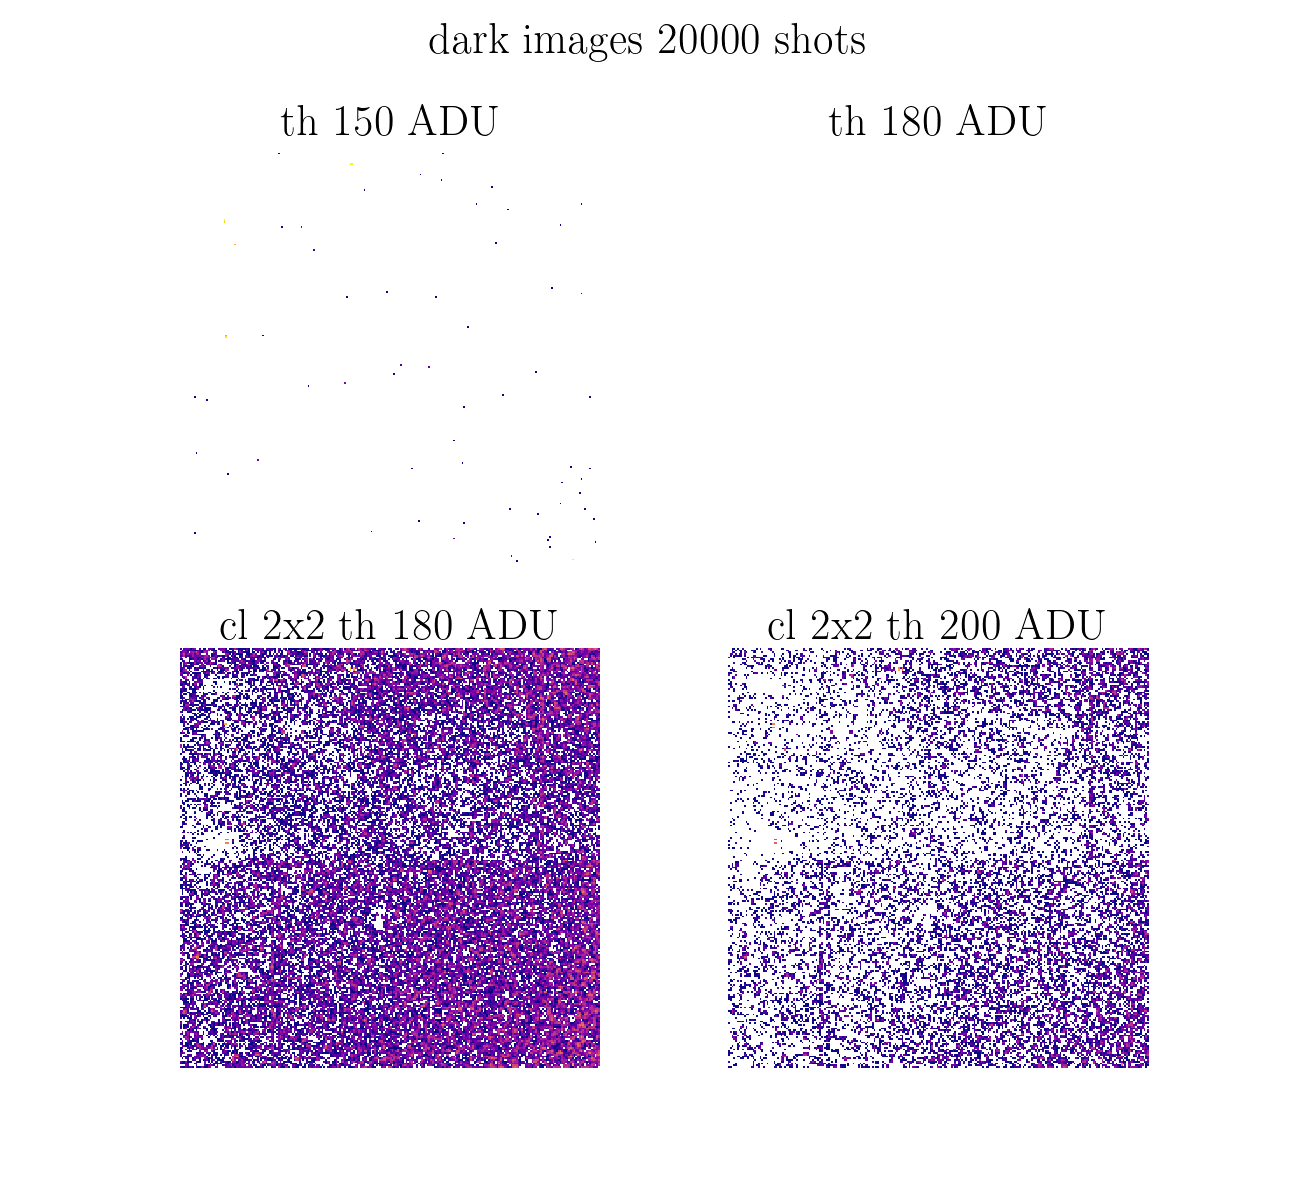

In [51]:
%matplotlib notebook
#grob

fig = plt.figure(figsize=(6.48,6))
fig.suptitle('dark images 20000 shots')
cmap = matplotlib.cm.get_cmap('plasma').copy()

axe = fig.add_subplot(2,2,1)
axe.set_title('th 150 ADU')
axe.axis('off')
axe.set_xticks([]) 
axe.set_yticks([])
image = imread('bachelorarbeit/220501_pictures/scattering/th_150_dark_capture/single_count_mask_only_th_150_sum_25000.tiff')
graph = image.astype(np.float64)
graph[image == 0] = np.nan
im = axe.imshow(graph[80:320, 80:320], norm=lognorm, cmap=cmap, interpolation='none', resample=False)

axe = fig.add_subplot(2,2,2)
axe.set_title('th 180 ADU')
axe.axis('off')
axe.set_xticks([]) 
axe.set_yticks([])
#image = imread('bachelorarbeit/220501_pictures/scattering/th_180_off_resonance/')
graph = image.astype(np.float64)
graph[image == 0] = np.nan
#im = axe.imshow(graph[80:320, 80:320], norm=lognorm, cmap=cmap, interpolation='none', resample=False)

axe = fig.add_subplot(2,2,3)
axe.set_title('cl 2x2 th 180 ADU')
axe.axis('off')
axe.set_xticks([]) 
axe.set_yticks([])
image = imread('bachelorarbeit/220501_pictures/scattering/cl_2_th_180_dark_capture/single_count_mask_cl_2_th_180_sum_10000.tiff')
graph = image.astype(np.float64)
graph[image == 0] = np.nan
im = axe.imshow(graph[80:320, 80:320], norm=lognorm, cmap=cmap, interpolation='none', resample=False)

axe = fig.add_subplot(2,2,4)
axe.set_title('cl 2x2 th 200 ADU')
axe.axis('off')
axe.set_xticks([]) 
axe.set_yticks([])
image = imread('bachelorarbeit/220501_pictures/scattering/cl_2_th_200_dark_capture/single_count_mask_cl_2_th_200_sum_10000.tiff')
graph = image.astype(np.float64)
graph[image == 0] = np.nan
im = axe.imshow(graph[80:320, 80:320], norm=lognorm, cmap=cmap, interpolation='none', resample=False)
#fig.savefig('test_ring.png', dpi=300, transparent=False)

# Histograms

In [80]:
hist_bins, noise_raw, noise_cl2, noise_cl3 =  np.loadtxt(data_path + 'noise_hist_070322.csv', delimiter=",", unpack=True)
hist_bins, signal_raw, signal_cl2, signal_cl3 =  np.loadtxt(data_path + 'signal_hist_070322.csv', delimiter=",", unpack=True)

In [81]:
noises = (noise_raw, noise_cl2, noise_cl3)
signals = (signal_raw, signal_cl2, signal_cl3)

[50.0, 75.0, 100.0, 125.0, 150.0, 175.0, 72.0]
[100.0, 200.0, 300.0, 400.0, 500.0, 171.0]
[200.0, 300.0, 400.0, 500.0, 600.0, 277.0]


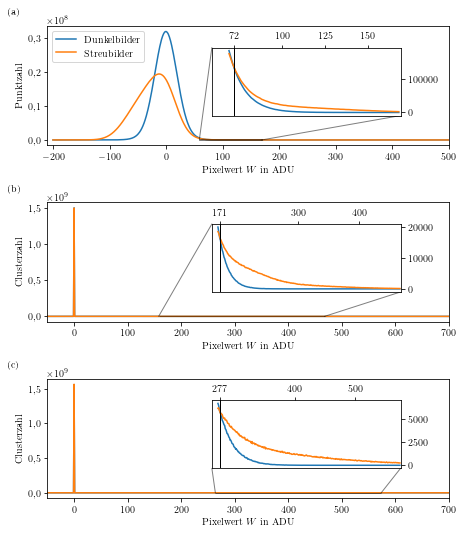

In [82]:
%matplotlib inline
#grob

fig = plt.figure(figsize=(6.48,7.5))
axes = fig.subplots(3,1)
titles = ('no processing', 'clustering 2x2', 'clustering 3x3')
c = 0
letters = ['(a)', '(b)', '(c)']
orders = [8, 9,9]
lims = [(-210,500), (-50, 700), (-50, 700)]
ylabels = ["Punktzahl", "Clusterzahl", "Clusterzahl"]
for axis, noise, signal, title, letter, order, lim, ylabel in zip(axes, noises, signals, titles, letters, orders, lims, ylabels):
    norm_coef = 1
    #norm_coef = max(np.max(noise), np.max(signal))
    noise = noise/norm_coef
    signal = signal/norm_coef
    axis.plot(hist_bins, noise, ms=2, color='C0', label=r'Dunkelbilder')
    axis.plot(hist_bins, signal, ms=2, color='C1', label=r'Streubilder')
    axis.text(-0.1, 1.1, letter, transform=axis.transAxes,)
    axis.set_xlim(lim)
    axis.yaxis.set_major_formatter(OOMFormatter(order=order))
    #axis.set_title(title)
    axis.set_ylabel(ylabel) # r"\begin{tabular}{c}Transmissions-\\ mittelwertsrate $\bar{\text{T}}$\end{tabular}"
    axins = axis.inset_axes([0.41, 0.25, 0.47, 0.57])
    args = np.argwhere(np.logical_and(signal >  noise, np.logical_and( hist_bins > 70, hist_bins < 450)))
    intersection_x = np.min(args)
    min_arg = intersection_x - 3   
    
    max_arg = min_arg + 300
    if c == 0:
        max_arg = min_arg + 100
    axins.plot(hist_bins[min_arg:max_arg], noise[min_arg:max_arg], ms=2, color='C0', label=r'noise')
    axins.plot(hist_bins[min_arg:max_arg], signal[min_arg:max_arg], ms=2, color='C1', label=r'signal')
    
    print(axins.get_xticks().tolist() + [hist_bins[intersection_x]])
    #axins.set_xticks()
    ticks = axins.get_xticks()
    ticks[1] = hist_bins[intersection_x]
    axins.set_xticks(ticks)
    axins.set_xlim(hist_bins[min_arg]-10, hist_bins[max_arg])
    axins.axvline(hist_bins[intersection_x], linestyle="-",color='black', linewidth=1, alpha=1)
    axins.xaxis.set_label_position('top')
    axins.xaxis.tick_top()
    axins.yaxis.set_label_position("right")
    axins.yaxis.tick_right()
    #axins.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: r"\num{%1.1e}" % x if x != 0 else "0"))
    axis.indicate_inset_zoom(axins, edgecolor="black")
    axis.set_xlabel(r'Pixelwert $W$ in ADU')
    #axis.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: r"\num{%1.1e}" % x if x != 0 else "0"))
    c+=1
    #axis.legend()
#axes.set_title('Soft X-Ray Range')
#axes.set_xlabel(r'Wiederholungszahl $N$ der Probe Ta(\SI{3}{\nano\meter})/[Fe(\SI{0.41}{\nano\meter})/Gd(\SI{0.45}{\nano\meter})]$_{\text{x}N}$/Ta(\SI{2}{\nano\meter})')
#axes.set_xscale('log')
#axes.set_ylabel(r"\begin{tabular}{c}Transmissions-\\ mittelwertsrate $\bar{\text{T}}$\end{tabular}")

#axes.grid(which='major')
#axes.grid(which='minor', color='#999999', linestyle='-', alpha=0.2)
#axes.xaxis.set_major_formatter(OOMFormatter(order = 0, fformat = "%1.0f"))
#axes.yaxis.set_major_formatter(OOMFormatter(order = 0, fformat = "%1.0f"))

# axes.xaxis.set_major_locator(FixedLocator(ticks))
# axes.xaxis.set_minor_locator(FixedLocator(subticks))
# axes.xaxis.set_major_formatter(NullFormatter())
# axes.set_ylim(0,1)
# axes.yaxis.set_major_locator(MultipleLocator(0.25))
# axes.set_xlim(0.2, 200.8)


# axes.yaxis.set_minor_locator(AutoMinorLocator(5))

#axes.set_title('Soft X-Ray Range')
#axes.set_xlabel(r'Wiederholungszahl $N$ der Probe Ta(\SI{3}{\nano\meter})/[Fe(\SI{0.41}{\nano\meter})/Gd(\SI{0.45}{\nano\meter})]$_{\text{x}N}$/Ta(\SI{2}{\nano\meter})')
#axes.set_xscale('log')
#axes.set_ylabel(r"\begin{tabular}{c}Polarisa-\\ tionsrate P\end{tabular}")

#axes.grid(which='major')
#axes.grid(which='minor', color='#999999', linestyle='-', alpha=0.2)
#axes.xaxis.set_major_formatter(OOMFormatter(order = 0, fformat = "%1.0f"))
#axes.yaxis.set_major_formatter(OOMFormatter(order = 0, fformat = "%1.0f"))
# axes.xaxis.set_major_locator(FixedLocator(ticks))
# axes.xaxis.set_minor_locator(FixedLocator(subticks))
# axes.xaxis.set_major_formatter(NullFormatter())
# axes.yaxis.set_major_locator(MultipleLocator(0.25))
# axes.set_xlim(0.2, 200.8)


# axes.yaxis.set_minor_locator(AutoMinorLocator(5))

axis = axes[2]
#axes.set_title('Soft X-Ray Range')
#axes.yaxis.set_label_position("right")
#axes.yaxis.tick_right()

#axes.set_xscale('log')
#axes.set_ylabel(r"\begin{tabular}{c}Gütezahlrate TP$^2$\end{tabular}")

#axes.grid(which='major')
#axes.grid(which='minor', color='#999999', linestyle='-', alpha=0.2)
#axes.xaxis.set_major_formatter(OOMFormatter(order = 0, fformat = "%1.0f"))
#axes.yaxis.set_major_formatter(OOMFormatter(order = 0, fformat = "%1.0f"))
# axes.xaxis.set_major_locator(FixedLocator(ticks))
# axes.xaxis.set_minor_locator(FixedLocator(subticks))
# axes.yaxis.set_major_locator(MultipleLocator(0.25))
# axes.set_xlim(0.2, 200.8)

fig.subplots_adjust(hspace=0.5)

# axes.yaxis.set_minor_locator(AutoMinorLocator(5))
# axes.yaxis.set_major_locator(MultipleLocator(50))
fig.tight_layout()
axes[0].legend()

In [83]:
fig.savefig(plots_output_path + 'no_pr_cl_2_cl_3_histograms.pgf',bbox_inches='tight', pad_inches=0, dpi=500)